# ANL252 Python for Data Analytics
## Group-based Assignment
January 2025 Semester

### Objective

This analysis aims to explore and process an employee attrition dataset, which is available for download from Canvas. The dataset contains key attributes related to employee demographics, job roles, work-life balance, and attrition status. 

The objectives of this analysis are as follows:  

1. **Data Import and Initial Exploration**  
   - Read the dataset using Python and determine its number of rows and columns.  
   - Discuss the rationale for checking data structure upon import.  

2. **Handling Missing Values**  
   - Identify variables with missing values using Python.  
   - Explain the importance of addressing missing data.  
   - Propose and implement appropriate missing data treatment methods, with justifications.  

3. **Data Analysis and Visualization**  
   - Generate three (3) charts and their corresponding three (3) tables to explore key relationships in the data.  
   - Provide insights and interpretations based on the visualizations.  
   - Highlight any notable trends or observations within the dataset.  

---

### **Data Import and Initial Exploration**  

The dataset was imported using the Pandas library, known for its efficiency and robust data manipulation capabilities. The `read_csv()` function was utilized to load the dataset into a DataFrame. By default, Pandas automatically detects data types for each column, but this can sometimes lead to misclassification.  

One such case is the Employee ID column, which consists of numerical values. However, since Employee IDs serve solely as unique identifiers and hold no meaningful numerical significance (i.e., arithmetic operations on them would be irrelevant), this column is considered nominal data. To ensure proper classification, we explicitly set its data type to string using the `dtype` parameter.  

To verify the dataset’s structure, we used the `df.shape` command, which returned (966, 16), indicating that the dataset contains 966 rows and 16 columns. As an additional verification step, the `display()` function was used to inspect the first and last five rows of the DataFrame. This approach provides better formatting in Jupyter Notebook and allows for a quick overview of the dataset’s structure, confirming that it was imported correctly.  

In [5]:
import pandas as pd
 
# Read the csv file
df = pd.read_csv('GBA_employee.csv', dtype = {'Employee ID': str}) # the Employee ID column is specified to be string instead of integer

# Display the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

display(df)

Number of rows: 966
Number of columns: 16


,Employee ID,Age,Gender,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Company Size,Company Reputation,Attrition
0,56207,49,Female,Technology,8549.0,Fair,Medium,Below Average,1,No,13,Bachelor Degree,Married,Small,Good,Left
1,61041,41,Male,Finance,7838.0,Good,High,Average,2,Yes,99,Associate Degree,Divorced,Large,Poor,Left
2,44027,27,Female,Media,5196.0,Excellent,Very High,Below Average,1,No,75,Bachelor Degree,Married,Large,Poor,Left
3,44324,22,Female,Healthcare,8184.0,Excellent,High,Below Average,1,No,98,Bachelor Degree,Single,Small,Excellent,Left
4,30266,22,Female,Education,4522.0,Good,Medium,Average,0,Yes,18,Master Degree,Married,Medium,Fair,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,35682,24,Male,Technology,9284.0,Good,Low,High,0,No,15,Associate Degree,Divorced,Small,Fair,Stayed
962,60385,54,Male,Technology,7653.0,Fair,Low,Average,0,Yes,80,Bachelor Degree,Divorced,Medium,Poor,Left
963,13877,45,Female,Education,3583.0,Good,Low,Average,1,No,64,High School,Married,Small,Poor,Stayed
964,26997,46,Male,Education,4630.0,Good,Medium,Below Average,0,No,18,Master Degree,Single,Small,Good,Stayed


---

### Handling Missing Values

Handling missing data is essential to ensure data integrity, accurate analysis, and reliable predictions. Ignoring missing values can lead to biased insights, distorted statistical measures, and negatively impact machine learning models. Below are key reasons why addressing missing data is crucial:  

1. **Preserving Data Accuracy**
   - Missing values can skew statistical calculations such as mean, variance, and correlations, leading to misleading conclusions.

2. **Avoiding Bias**
   - If missing data follows a pattern (i.e., it is not missing at random), it may introduce bias, affecting the representativeness of the dataset.

3. **Ensuring Compatibility with Machine Learning Models**
   - Many machine learning algorithms cannot process datasets with missing values, making data preprocessing a necessary step for model training.

4. **Enhancing Model Performance**  
   - Properly handling missing values improves the accuracy, reliability, and generalization ability of predictive models.  

To identify variables with missing values, we use the `isnull().sum()` function in Python, which counts the number of missing entries in each column. The output reveals that the following columns contain missing values:  

- **Gender:** 2 missing values  
- **Monthly Income:** 168 missing values  
- **Overtime:** 75 missing values

In [8]:
df.isnull().sum()

Employee ID               0
Age                       0
Gender                    2
Job Role                  0
Monthly Income          168
Work-Life Balance         0
Job Satisfaction          0
Performance Rating        0
Number of Promotions      0
Overtime                 75
Distance from Home        0
Education Level           0
Marital Status            0
Company Size              0
Company Reputation        0
Attrition                 0
dtype: int64

---

### Handling Missing Values: Step-by-Step Approach

To ensure data integrity and unbiased analysis, we systematically handled missing values in a structured manner. Below are the steps taken to clean the dataset:

#### 1. Creating a Copy of the Dataset
Before making any modifications, we created a copy of the master dataset. This ensures that the original data remains untouched, allowing for easy reference and reproducibility of the analysis. By working on a separate copy, we prevent unintentional data loss and can revert to the original dataset if needed.

In [12]:
# Create a copy of master dataset
df_copy = df.copy()

# Create a DataFrame from df_copy
df_cleaned = pd.DataFrame(df_copy)

#### 2. Removing Rows with Missing Gender Values
- The Gender column had 2 missing values out of 966 rows.  
- Given that this represents only ~0.2% of the dataset, removing these rows is statistically insignificant and does not impact overall analysis.  
- Since gender is a categorical variable, imputing values could introduce bias, making deletion the best approach.  

#### 3. Filling Missing Values in the Overtime Column
- The Overtime column had 75 missing values.  
- Dropping these rows would result in a significant reduction in dataset size, potentially affecting relationships and trends.  
- Instead, we used `fillna('Not Known')` to retain all data points while acknowledging the missing information.|

In [14]:
# Remove rows with missing gender values
df_cleaned.dropna(subset=['Gender'], inplace=True)

# Fill all the missing data in Overtime column with Not Known
df_cleaned['Overtime']=df_cleaned['Overtime'].fillna('Not Known')

#### 4. Handling Missing Values in Monthly Income
Addressing missing values in Monthly Income required a more nuanced approach to maintain accuracy:

##### 4.1 Identifying and Removing Outliers

- Using the Interquartile Range (IQR) method, we calculated the 25th percentile (Q1) and 75th percentile (Q3).  
- We then defined an acceptable range for monthly income by removing outliers beyond 1.5 times the IQR.  
- This step was crucial because extreme income values could skew any computed averages.

In [17]:
# Finding interquartile range,25th and 75th percentile
q1 = df['Monthly Income'].quantile(q=.25)
q3 = df['Monthly Income'].quantile(q=.75)
iqr= q3-q1


# Define upper and lower limits to give a range to remove
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

# Removing outliers
df_filtered= df_cleaned[~((df_cleaned['Monthly Income'] < lower_limit) | (df_cleaned['Monthly Income'] > upper_limit))]

##### 4.2 Computing the Average Monthly Income per Job Role

- Since income varies significantly across job roles, using a single overall mean would be inaccurate.  
- Instead, we grouped employees by Job Role and calculated the mean Monthly Income for each job role.

In [19]:
# Finding each unique job 
Jobs=df_cleaned['Job Role'].unique()
print(Jobs)

# Making tuple of all Job Roles
Job_Role = ('Education', 'Technology', 'Finance', 'Media', 'Healthcare')  

# Counter used for accessing different job role
i = 0  

# Initialize a list with 0 to store the mean monthly income for each job role.
Monthly_Mean = [0] * len(Job_Role)

# Finding monthly mean pay for each job role

# Iterate over each job role in 'Job_Role' and compute the mean monthly income for that role using the filtered dataset
for Role in Job_Role:
   # Store the computed mean values in the `Monthly_Mean` list.
   Monthly_Mean[i] = df_filtered.loc[df_cleaned['Job Role'] == Role, 'Monthly Income'].mean()
   i += 1

['Technology' 'Finance' 'Media' 'Healthcare' 'Education']


##### 4.3 Filling Missing Monthly Income Values

- The computed job role-specific means were then used to replace missing values in the Monthly Income column.  
- This approach ensures that missing values are filled accurately, reflecting realistic salary expectations for each job category rather than using a single general average that may misrepresent actual earnings.

In [21]:
# Create a dictionary (`job_means`) that maps job roles to their corresponding mean income 
job_means = dict(zip(Job_Role, Monthly_Mean))

# Fill missing values in the 'Monthly Income' column of `df` using the computed mean for the corresponding job role
for role, mean in job_means.items():
    df_cleaned.loc[(df_cleaned['Job Role'] == role) & (df_cleaned['Monthly Income'].isnull()),'Monthly Income'] = mean

df_cleaned.isnull().sum()

Employee ID             0
Age                     0
Gender                  0
Job Role                0
Monthly Income          0
Work-Life Balance       0
Job Satisfaction        0
Performance Rating      0
Number of Promotions    0
Overtime                0
Distance from Home      0
Education Level         0
Marital Status          0
Company Size            0
Company Reputation      0
Attrition               0
dtype: int64

---

### Data Analysis and Visualization

Before generating visualizations, it is essential to understand the structure of the dataset and the types of data available. This ensures that we select the most appropriate plots for each variable and avoid misinterpretations.  

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 965
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           964 non-null    object 
 1   Age                   964 non-null    int64  
 2   Gender                964 non-null    object 
 3   Job Role              964 non-null    object 
 4   Monthly Income        964 non-null    float64
 5   Work-Life Balance     964 non-null    object 
 6   Job Satisfaction      964 non-null    object 
 7   Performance Rating    964 non-null    object 
 8   Number of Promotions  964 non-null    int64  
 9   Overtime              964 non-null    object 
 10  Distance from Home    964 non-null    int64  
 11  Education Level       964 non-null    object 
 12  Marital Status        964 non-null    object 
 13  Company Size          964 non-null    object 
 14  Company Reputation    964 non-null    object 
 15  Attrition             964 no

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Monthly Income'}>],
       [<Axes: title={'center': 'Number of Promotions'}>,
        <Axes: title={'center': 'Distance from Home'}>]], dtype=object)

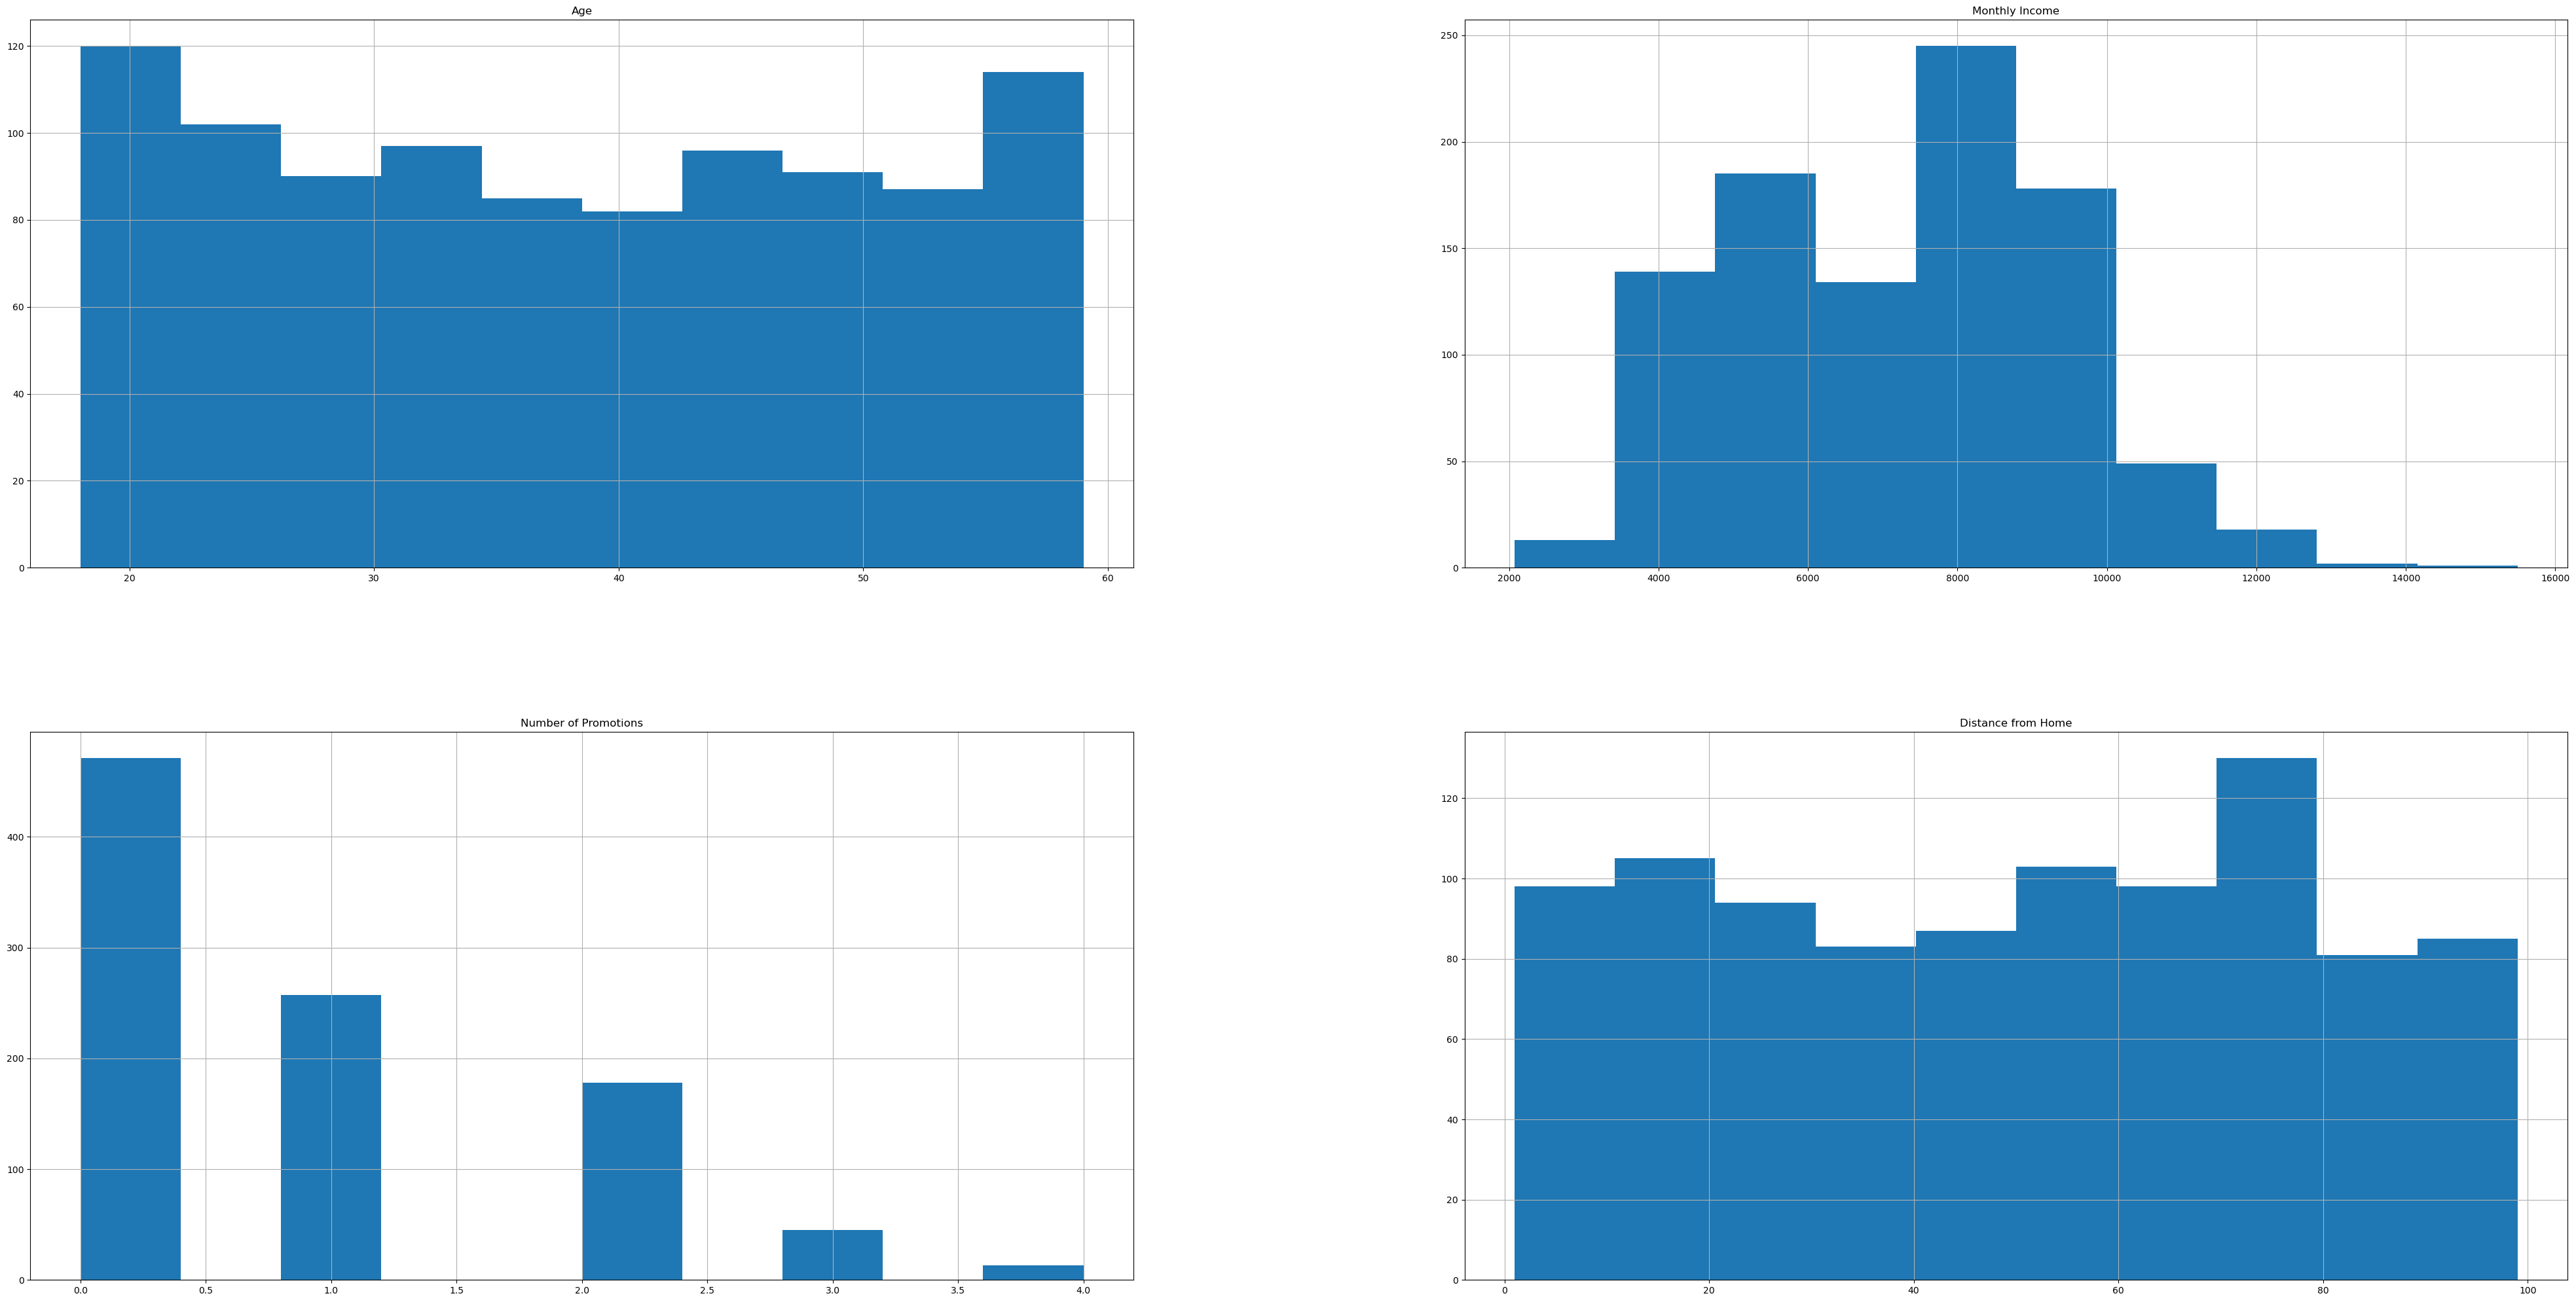

In [24]:
# Inspect column data types, missing values, and determine whether columns are categorical or numerical
df_cleaned.info()

# Generate histograms for all numerical columns - quick visual overview of data distributions
df_cleaned.hist(figsize=(50,25))

To explore key relationships in the dataset, we selected three visualizations:  
1. **Overtime vs. Performance Rating**  
2. **Work-Life Balance vs. Marital Status**  
3. **Job Role vs. Income Group**

We ran a data validation step by checking the unique values in key categorical columns such as Overtime, Performance Rating, Work-Life Balance, Marital Status, and Job Role. This helped ensure category consistency, avoid unexpected errors, and provide a reference when creating visualizations.

In [26]:
# Check unique string values for 
# "Overtime" and "Performance Rating" columns,
# "Work-Life Balance" and "Marital Status" columns, and
# "Job Role" column

overtime_values = df_cleaned['Overtime'].unique()
performance_rating_values = df_cleaned['Performance Rating'].unique()
worklife_balance_values = df_cleaned['Work-Life Balance'].unique()
marital_status_values = df_cleaned['Marital Status'].unique()
job_role_values = df_cleaned['Job Role'].unique()

# Print unique values
print("Unique values in 'Overtime':", overtime_values)
print("Unique values in 'Performance Rating':", performance_rating_values)
print("Unique values in 'Work-Life Balance':", worklife_balance_values)
print("Unique values in 'Marital Status':", marital_status_values)
print("Unique values in 'Job Role':", job_role_values)

Unique values in 'Overtime': ['No' 'Yes' 'Not Known']
Unique values in 'Performance Rating': ['Below Average' 'Average' 'Low' 'High']
Unique values in 'Work-Life Balance': ['Fair' 'Good' 'Excellent' 'Poor']
Unique values in 'Marital Status': ['Married' 'Divorced' 'Single']
Unique values in 'Job Role': ['Technology' 'Finance' 'Media' 'Healthcare' 'Education']


To ensure consistency and efficiency in our visual analysis, we developed three custom functions:
- **Clustered Bar Chart Function:** Standardizes formatting across visualizations.
- **Summary Table Function:** Provides a structured, tabular view of data before plotting.
- **Percentage Calculation Function:** Converts raw counts into percentages to improve data interpretation and reduce visual bias.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def plot_clustered_bar_chart(data, x_column, bar_column, title, xlabel, ylabel, category_order=None, show_percentages=True, add_income_notes=False):
    """
    Standardised function to create a clustered bar chart.
    """
    # Group and count data
    grouped_data = data.groupby([x_column, bar_column], observed=False).size().unstack()

    # Reorder columns if category order is provided
    if category_order:
        grouped_data = grouped_data[category_order]
    
    # Define bar width and positions
    bar_width = 0.2
    x_labels = grouped_data.index  # X categories
    x = np.arange(len(x_labels))  # X positions

    plt.figure(figsize=(15,6))

    # Plot each category as a separate bar
    bars_list = []  # Store bar containers to access their heights later
    for i, category in enumerate(grouped_data.columns):
        bars = plt.bar(x + i * bar_width, grouped_data[category], width=bar_width, label=category, edgecolor='black', linewidth=0.2)
        bars_list.append(bars)

    # Set labels and formatting
    plt.xticks(x + (bar_width * (len(grouped_data.columns) - 1)) / 2, x_labels, rotation=30, ha='right')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(title=bar_column)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show percentages inside bars
    if show_percentages:
        all_heights = [[p.get_height() for p in bars] for bars in bars_list]

        for bars in bars_list:
            for i, p in enumerate(bars):
                total = sum(xgroup[i] for xgroup in all_heights)
                if total > 0:
                    percentage = f'{(100 * p.get_height() / total) :.1f}%'
                    plt.annotate(percentage, 
                                 (p.get_x() + p.get_width() / 2, p.get_height() - (p.get_height() * 0.1)),  # Move inside bar
                                 size=7,
                                 ha='center',
                                 va='top',
                                 color='black',
                                 fontweight='bold')

    # Add explanation notes for Monthly income 
    if add_income_notes:
        plt.figtext(0.27, 0.72,
                    'Monthly Income: \n' +\
                    '   Very low = $3,000 or less \n' +\
                    '        Low = $3,001 - $6,000 \n' +\
                    '     Medium = $6,001 - $9,000 \n' +\
                    '       High = $9,001 - $12,000 \n' +\
                    '  Very high = $12,001 or more',
                    fontdict = {'family':'monospace','color':'darkblue','size':6.5}, 
                    bbox = dict(facecolor = 'bisque', alpha = 0.2))


    plt.show()

In [30]:
def generate_category_table(data, x_column, bar_column, col_order):
    """
    Creates a summary table showing the relationship between two categorical variables.
    """
    # Group and count data
    table = data.groupby([x_column, bar_column], observed=False).size().unstack()

    # Reorder columns if col_order is provided
    if col_order:
        table = table[col_order]
        
    return table

In [31]:
def generate_percentage_table(count_table, col_order, drop_category=None):
    """
    Converts a count table into percentages for better comparisons.
    """
    # Convert all values to numeric (force conversion)
    count_table = count_table.apply(pd.to_numeric, errors='coerce')

    # Compute percentage
    percentage_table = count_table.div(count_table.sum(axis=1), axis=0) * 100
    
    # Remove specified category if needed
    if drop_category:
        percentage_table = percentage_table.drop(index=drop_category, errors='ignore')

    # Reorder columns if col_order is provided
    if col_order:
        percentage_table = percentage_table[col_order]
    
    return percentage_table

### 1. Overtime vs. Performance Rating

The first visualization explores the relationship between Overtime and Performance Rating to determine if working overtime has an impact on employee performance.  

Table Overview for Overtime vs Performance Rating:


Performance Rating,Low,Below Average,Average,High
Overtime,,,,
No,25,82,364,135
Not Known,5,4,50,16
Yes,15,42,168,58


Percentage Overview for Overtime vs Performance Rating:


Performance Rating,Low,Below Average,Average,High
Overtime,,,,
No,4.125413,13.531353,60.066007,22.277228
Yes,5.300353,14.840989,59.363958,20.494700


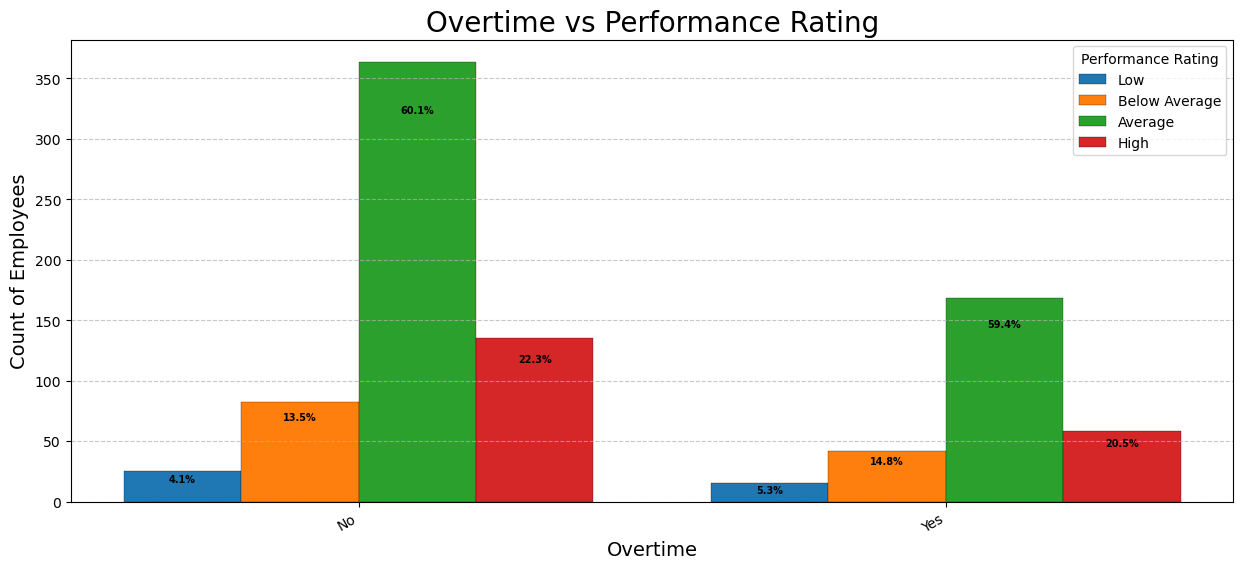

In [33]:
# Define the desired order for Performance Rating
performance_order = ['Low', 'Below Average', 'Average', 'High']

# Generate a table for Overtime vs Performance Rating
overtime_performance_table = generate_category_table(df_cleaned, 'Overtime', 'Performance Rating', performance_order)
print('Table Overview for Overtime vs Performance Rating:')
display(overtime_performance_table)

# Generate percentage table for Overtime vs Performance Rating
overtime_performance_percentage = generate_percentage_table(overtime_performance_table, performance_order, drop_category='Not Known')
print('Percentage Overview for Overtime vs Performance Rating:')
display(overtime_performance_percentage)

# Remove 'Not Known' category from the Overtime vs Performance Rating visualization
filtered_df = df_cleaned[df_cleaned['Overtime'] != 'Not Known']

# Plot a clustered bar chart for Overtime vs Performance Rating
plot_clustered_bar_chart(
    filtered_df, 
    x_column='Overtime',
    bar_column='Performance Rating',
    title='Overtime vs Performance Rating',
    xlabel='Overtime',
    ylabel='Count of Employees',
    category_order=performance_order,
)

From the chart, we observe that most employees, regardless of overtime status, receive an average performance rating:
- 59.4% of employees working overtime fall under the "Average" rating.
- 60.1% of employees without overtime also fall under the "Average" rating.

Interestingly, employees without overtime have a slightly higher percentage of high-performance ratings (22.3%) compared to those with overtime (20.5%). This suggests that overtime does not necessarily correlate with higher performance, and in some cases, employees not working overtime may even perform better.

#### **Key Insights:**  

- Overtime does not drastically impact performance — employees with and without overtime show similar performance distributions.
- High-performance ratings are slightly higher for employees without overtime, implying that longer working hours do not always equate to better performance.
- Other factors, such as job role, work-life balance, or motivation, may contribute to performance more than overtime alone.

While overtime may provide additional working hours, its impact on employee performance is not definitive and likely depends on other workplace factors.  

### 2. Marital Status vs. Work-Life Balance

This visualization examines whether marital status influences work-life balance among employees.  

Table Overview for Marital Status vs Work-Life Balance:


Work-Life Balance,Poor,Fair,Good,Excellent
Marital Status,,,,
Divorced,21,45,57,22
Married,60,147,191,96
Single,39,112,126,48


Percentage Overview for Marital Status vs Work-Life Balance:


Work-Life Balance,Poor,Fair,Good,Excellent
Marital Status,,,,
Divorced,14.482759,31.034483,39.310345,15.172414
Married,12.145749,29.757085,38.663968,19.433198
Single,12.000000,34.461538,38.769231,14.769231


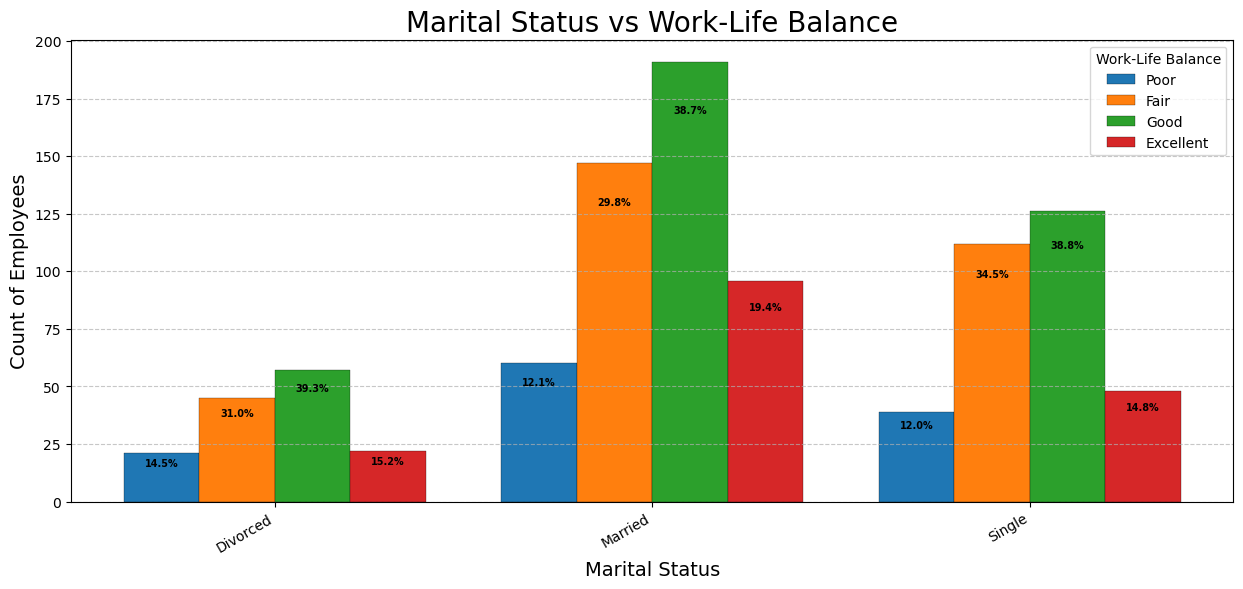

In [51]:
# Define the desired order for Work-Life Balance
worklife_order = ['Poor', 'Fair', 'Good', 'Excellent']

# Generate a table for Marital Status vs Work-Life Balance
marital_worklife_table = generate_category_table(df_cleaned, 'Marital Status', 'Work-Life Balance', worklife_order)
print('Table Overview for Marital Status vs Work-Life Balance:')
display(marital_worklife_table)

# Generate percentage table for Marital Status vs Work-Life Balance
marital_worklife_percentage = generate_percentage_table(marital_worklife_table, worklife_order)
print('Percentage Overview for Marital Status vs Work-Life Balance:')
display(marital_worklife_percentage)

# Plot a clustered bar chart for Marital Status vs Work-Life Balance
plot_clustered_bar_chart(
    df_cleaned, 
    x_column='Marital Status',
    bar_column='Work-Life Balance',
    title='Marital Status vs Work-Life Balance',
    xlabel='Marital Status',
    ylabel='Count of Employees',
    category_order=worklife_order,
)

From the graph, we observe that the majority of employees, regardless of marital status, rate their work-life balance as either "Good" or "Fair":
- "Good" is the most common rating across all marital statuses.
- Married employees report the highest percentage of "Excellent" work-life balance (19.4%) and have a relatively high "Good" rating (38.7%).
- Divorced employees, despite being the smallest group, have the highest percentage of employees with a "Poor" work-life balance (14.5%), suggesting they may face additional challenges balancing work and personal life.

#### **Key Insights:**  

- The majority of employees across all marital statuses rate their work-life balance as "Good" or "Fair".  
- Married employees tend to report the best work-life balance, with the highest "Excellent" ratings.  
- Divorced employees show the highest percentage of "Poor" work-life balance, indicating they may face additional stressors that affect their work-life balance.  

Overall, while marital status may play a role, work-life balance is also likely influenced by other factors such as workload, job role, or company policies.

### **Job Role vs. Income Group**  

Before plotting, Monthly Income was transformed into categorical variables based on predefined salary ranges:  

| Income Group  | Monthly Income Range (\$) |
|---------------|---------------------------|
| **Very Low**  | ≤ 3,000                   |
| **Low**       | 3,001 – 6,000             |
| **Medium**    | 6,001 – 9,000             |
| **High**      | 9,001 – 12,000            |
| **Very High** | > 12,000                  |

The dataset was then sorted by "Income Group" and "Job Role" to ensure clarity in visualization.  

In [56]:
# Function to categorise monthly income
def IncomeGroup(income):   
	if income <= 3000 : return 'Very low'
	elif income <= 6000 : return 'Low'
	elif income <= 9000 : return 'Medium'
	elif income <= 12000 : return 'High'
	else : return 'Very high'

# Apply IncomeGroup function and set as categorical
df_cleaned['Income Group'] = pd.Categorical(df_cleaned['Monthly Income'].map(IncomeGroup))

Table Overview for Job Role vs Income Group:


Income Group,Very low,Low,Medium,High,Very high
Job Role,,,,,
Education,1,198,4,0,0
Finance,0,6,96,38,3
Healthcare,0,7,178,37,0
Media,0,95,52,0,0
Technology,0,8,93,141,7


Percentage Overview for Job Role vs Income Group:


Income Group,Very low,Low,Medium,High,Very high
Job Role,,,,,
Education,0.492611,97.536946,1.970443,0.000000,0.000000
Finance,0.000000,4.195804,67.132867,26.573427,2.097902
Healthcare,0.000000,3.153153,80.180180,16.666667,0.000000
Media,0.000000,64.625850,35.374150,0.000000,0.000000
Technology,0.000000,3.212851,37.349398,56.626506,2.811245


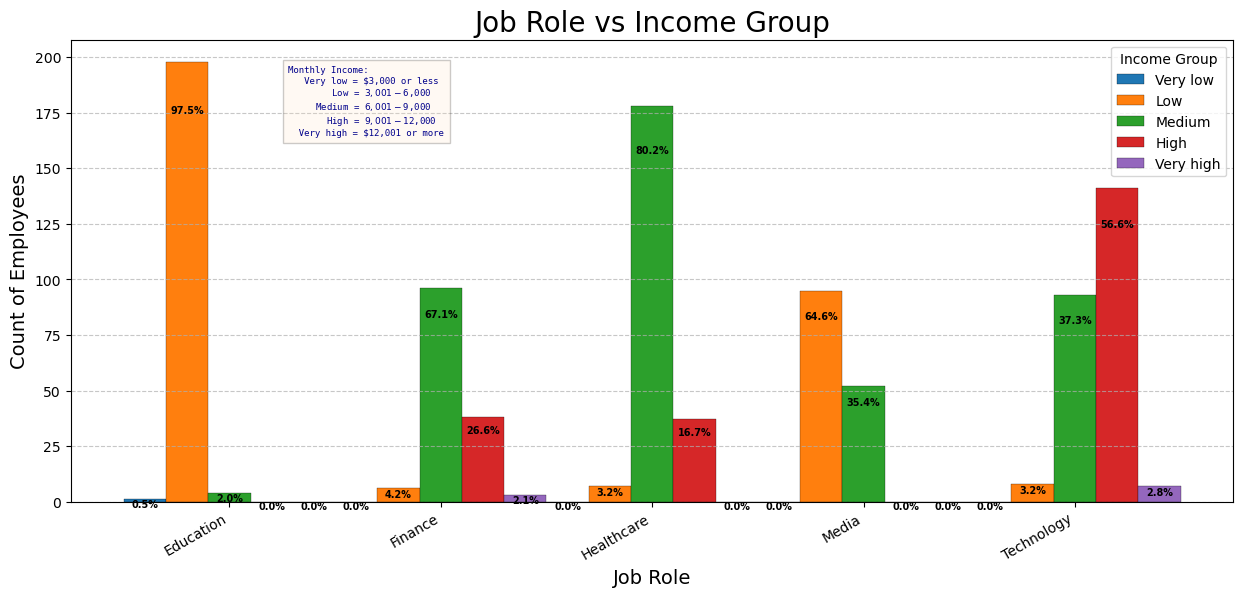

In [58]:
# Define the desired order for Income Group
income_order = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Generate a table for Job Role vs Income Group
job_income_table = generate_category_table(df_cleaned, 'Job Role', 'Income Group', income_order)
print('Table Overview for Job Role vs Income Group:')
display(job_income_table)

# Generate percentage table for Job Role vs Income Group
job_income_percentage = generate_percentage_table(job_income_table, income_order)
print('Percentage Overview for Job Role vs Income Group:')
display(job_income_percentage)

# Plot a clustered bar chart for Job Role vs Income Group
plot_clustered_bar_chart(
    df_cleaned, 
    x_column='Job Role',
    bar_column='Income Group',
    title='Job Role vs Income Group',
    xlabel='Job Role',
    ylabel='Count of Employees',
    category_order=income_order,
    add_income_notes=True,
)

From the graph, we observe the following key insights:  
- Education sector employees earn the least, with the vast majority falling into the Low or Very Low income groups.  
- Technology sector employees earn the highest, with a significant proportion in the High and Very High income groups.  
- Finance and Healthcare sectors show more balanced income distributions, with a mix of Medium, High, and Very High income levels.  
- Media sector employees predominantly fall within the Medium to Low income range, with few in the highest income bracket.  

#### **Key Takeaways:**

- Education sector is the lowest-paying industry, reinforcing the well-known income gap in education-related professions.  
- Technology sector is the highest-paying, reflecting the high demand and specialized skills required in the industry.  
- Income distribution varies significantly by job sector, showing clear trends in compensation across industries.  

This analysis highlights the salary disparities between different job roles, offering valuable insights into income trends within the dataset.  